# Sorting Arrays

**Fast Sorting in NumPy: np.sort and np.argsort**

In [6]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)
x.sort()    # sort the array in-place!!
i = np.argsort(x)

In [13]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
np.sort(X, axis=0)   # sort each column of X
np.sort(X, axis=1)

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

**Partial Sorts: Partitioning**  
np.partition takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [16]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [25]:
np.partition(X, 2, axis=1)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [26]:
np.argpartition(x, 3)

array([1, 3, 2, 6, 4, 5, 0])

**Example: k-Nearest Neighbors**

In [16]:
X = rand.rand(10, 2)

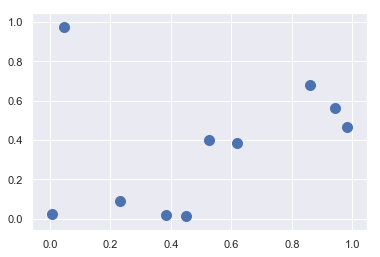

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s=100)

Using the efficient broadcasting and aggregation routines provided by NumPy we can compute the matrix of square distances in a single line of code:

In [18]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]])

* Notice that the first column gives the numbers 0 through in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.  
* If we're simply interested in the neareset k neighbors, all we need is to partition each row so that the smallest k + 1 squared distances come first:

In [19]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

Let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

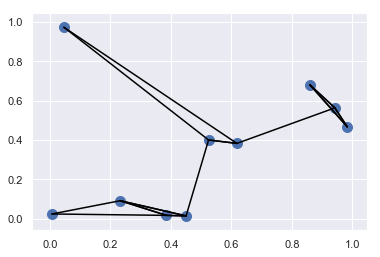

In [20]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

**Structured Data: NumPy's Structured Arrays**

......